In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

%matplotlib inline

In [2]:
zip_df = pd.read_pickle('../data/wip/zip_df.pkl')
zip_df

,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.0,161000.0,103100.0,133400.0,117500.0,115800.0,87000.0,88500.0,97200.0,91200.0,...,122700.0,112200.0,112500.0,89400.0,101900.0,103000.0,109200.0,166800.0,155500.0,117100.0
1996-05-01,112800.0,160100.0,103400.0,132700.0,117300.0,115700.0,87000.0,88500.0,97100.0,91100.0,...,124200.0,112400.0,113100.0,89800.0,102900.0,103900.0,109600.0,166200.0,154900.0,117200.0
1996-06-01,112600.0,159300.0,103600.0,132000.0,117100.0,115500.0,87100.0,88400.0,97000.0,91000.0,...,125700.0,112600.0,113800.0,90200.0,103800.0,104700.0,110000.0,165400.0,154200.0,117300.0
1996-07-01,112300.0,158600.0,103800.0,131400.0,117000.0,115300.0,87200.0,88300.0,96800.0,90800.0,...,127200.0,112800.0,114400.0,90600.0,104700.0,105500.0,110400.0,164400.0,153500.0,117400.0
1996-08-01,112100.0,158000.0,103900.0,130800.0,116800.0,115100.0,87400.0,88200.0,96600.0,90700.0,...,128600.0,113000.0,115100.0,91000.0,105400.0,106200.0,110800.0,163500.0,152800.0,117500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,221700.0,342000.0,213300.0,268100.0,205400.0,243800.0,151400.0,173300.0,187400.0,201200.0,...,258800.0,219100.0,250200.0,206700.0,261100.0,262800.0,273500.0,402300.0,396200.0,291900.0
2018-01-01,221700.0,344500.0,215600.0,268100.0,204500.0,244600.0,150100.0,174600.0,188100.0,204600.0,...,259400.0,218900.0,250600.0,206100.0,261300.0,262800.0,273800.0,406200.0,397500.0,294200.0
2018-02-01,221700.0,347400.0,217900.0,268800.0,206800.0,246700.0,150100.0,175900.0,189000.0,211200.0,...,259900.0,218300.0,250100.0,205600.0,261400.0,262300.0,273800.0,409800.0,398900.0,297500.0


In [3]:
# How many rows have x number of missing values (number of rows is the value column of output, number of missing is index)
missing_count = zip_df.isna().sum().value_counts().sort_index()
missing_count

0      13684
15         1
21         2
87       118
93        31
99        21
105       52
107       13
111       78
117       56
123       27
129       20
135        7
141        6
147        9
153       11
159        7
165        1
167      230
171       41
177       33
183       24
189       27
195       18
201       55
207       42
213       53
219       56
dtype: int64

In [4]:
# How many rows are missing values? (sum of counts in missing_count minus the number of entries with zero missing: 13684)
missing_count.sum() - 13684

1039

In [5]:
# About Seven Percent of zipcodes are missing 15 or more entries
1039/len(zip_df.columns)

0.07056985668681655

In [6]:
zip_df.index.max()

Timestamp('2018-04-01 00:00:00')

In [7]:
# Are there any missing values recently-- last six months-- (no), if so discard those
zip_df.iloc[zip_df.index > '2017-10-01'].isna().sum().value_counts()

0    14723
dtype: int64

## Project Plan
1) Shape data by zipcode(columns), indexed by date

    - Plan to deal with missing values, how many months missing is okay? Imputation potentially?

2) Test models on 1 zipcode, outputting best model (accuracy measure?) and best differencing params

    - Difference/decompose each column before fitting models, use adfuller as stationarity test
    - Use a 75-25 Train/Test Split

3) Create decision function based off ROI adjusted for loss scenarios/conf int.

4) Test models on 10 zipcodes, outputting best model (accuracy measure?), best differencing params for each zipcode, as well as largest predicted ROI

5) Test models on all zipcodes as in step 4

6) Modular add-ons (rent offset, performance over time, etc.)

In [8]:
# Convert columns to string for easier index access, move this step higher up the workflow
zip_df.columns = [str(x) for x in zip_df.columns]
zip_df.columns

Index(['1001', '1002', '1005', '1007', '1008', '1010', '1011', '1013', '1020',
       '1026',
       ...
       '99654', '99664', '99669', '99701', '99705', '99709', '99712', '99801',
       '99835', '99901'],
      dtype='object', length=14723)

In [9]:
# Notes from checkin:

# Results by client class, who can take advantage of x? Do you need minimum amount of capital etc.?



In [10]:
zip_df['1001']

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: 1001, Length: 265, dtype: float64

In [11]:

adfuller(zip_df['1001'])

(-1.7467926412738275,
 0.40717889973199395,
 13,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3563.9412458378274)

<Figure size 432x288 with 0 Axes>

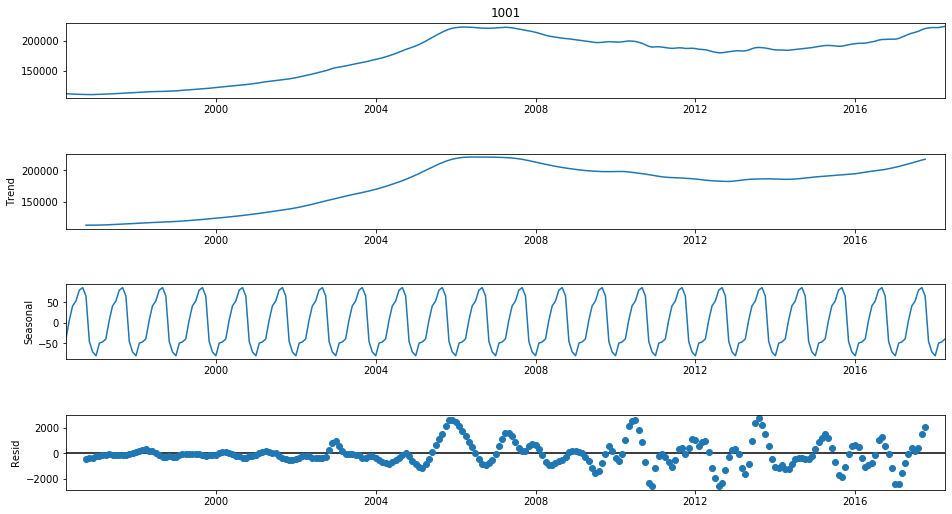

In [12]:
decomposition = seasonal_decompose(zip_df['1001'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

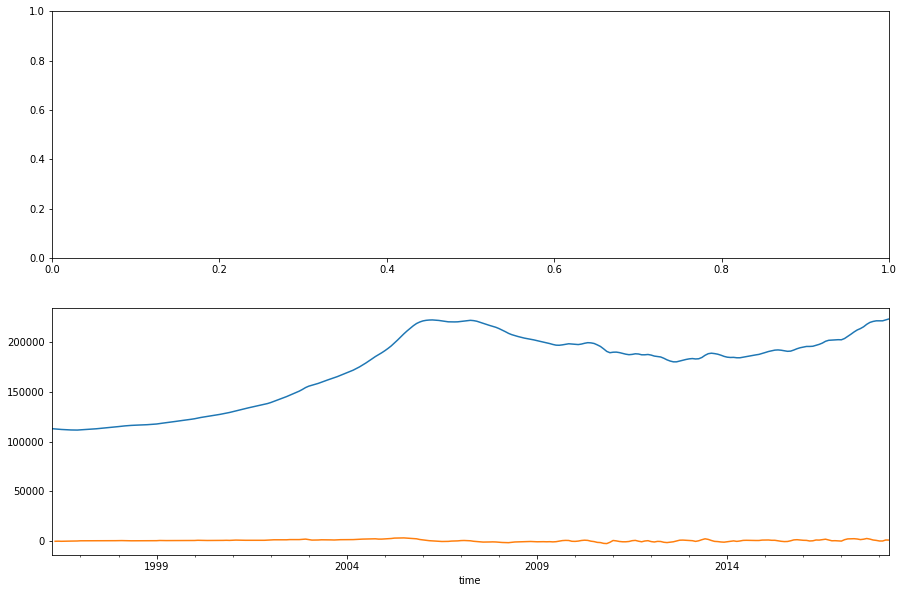

In [13]:
one_train = zip_df['1001']

fig, axs = plt.subplots(2, figsize=(15,10))
axs[0] = one_train.plot()
axs[1] = one_train.diff().plot()
plt.show()

In [14]:
# Stationarity test with no lag
adfuller(one_train)

(-1.7467926412738275,
 0.40717889973199395,
 13,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3563.9412458378274)

In [15]:
# Stationarity with 1 lag
adfuller(one_train.diff()[1:])

(-1.9453525470037503,
 0.3110356104138362,
 12,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3552.048382789642)

In [16]:
# Stationarity with 2 lags
adfuller(one_train.diff()[1:].diff()[1:])

(-6.627156477050341,
 5.8372030590914575e-09,
 11,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3540.671779819917)

In [17]:
one_train.diff()[1:].diff()[1:]

time
1996-06-01     100.0
1996-07-01    -100.0
1996-08-01     100.0
1996-09-01       0.0
1996-10-01     100.0
               ...  
2017-12-01    -400.0
2018-01-01    -600.0
2018-02-01       0.0
2018-03-01    1000.0
2018-04-01    -100.0
Name: 1001, Length: 263, dtype: float64

In [18]:
train_ind = one_train.index[0:round(len(one_train)*.75)]
test_ind = [i for i in one_train.index if not i in train_ind]
test_ind
one_test = one_train[test_ind]
one_test

time
2012-11-01    182100.0
2012-12-01    182800.0
2013-01-01    183400.0
2013-02-01    183700.0
2013-03-01    183300.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: 1001, Length: 66, dtype: float64

In [19]:
one_train = one_train[train_ind]
one_train

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2012-06-01    182400.0
2012-07-01    181200.0
2012-08-01    180400.0
2012-09-01    180400.0
2012-10-01    181200.0
Name: 1001, Length: 199, dtype: float64

In [20]:
one_train.diff()[1:].diff()[1:]

time
1996-06-01    100.0
1996-07-01   -100.0
1996-08-01    100.0
1996-09-01      0.0
1996-10-01    100.0
              ...  
2012-06-01   -300.0
2012-07-01    400.0
2012-08-01    400.0
2012-09-01    800.0
2012-10-01    800.0
Name: 1001, Length: 197, dtype: float64

In [21]:
one_train[one_train.index == '2018-04-01']

Series([], Name: 1001, dtype: float64)

In [22]:
zip_df

,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.0,161000.0,103100.0,133400.0,117500.0,115800.0,87000.0,88500.0,97200.0,91200.0,...,122700.0,112200.0,112500.0,89400.0,101900.0,103000.0,109200.0,166800.0,155500.0,117100.0
1996-05-01,112800.0,160100.0,103400.0,132700.0,117300.0,115700.0,87000.0,88500.0,97100.0,91100.0,...,124200.0,112400.0,113100.0,89800.0,102900.0,103900.0,109600.0,166200.0,154900.0,117200.0
1996-06-01,112600.0,159300.0,103600.0,132000.0,117100.0,115500.0,87100.0,88400.0,97000.0,91000.0,...,125700.0,112600.0,113800.0,90200.0,103800.0,104700.0,110000.0,165400.0,154200.0,117300.0
1996-07-01,112300.0,158600.0,103800.0,131400.0,117000.0,115300.0,87200.0,88300.0,96800.0,90800.0,...,127200.0,112800.0,114400.0,90600.0,104700.0,105500.0,110400.0,164400.0,153500.0,117400.0
1996-08-01,112100.0,158000.0,103900.0,130800.0,116800.0,115100.0,87400.0,88200.0,96600.0,90700.0,...,128600.0,113000.0,115100.0,91000.0,105400.0,106200.0,110800.0,163500.0,152800.0,117500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,221700.0,342000.0,213300.0,268100.0,205400.0,243800.0,151400.0,173300.0,187400.0,201200.0,...,258800.0,219100.0,250200.0,206700.0,261100.0,262800.0,273500.0,402300.0,396200.0,291900.0
2018-01-01,221700.0,344500.0,215600.0,268100.0,204500.0,244600.0,150100.0,174600.0,188100.0,204600.0,...,259400.0,218900.0,250600.0,206100.0,261300.0,262800.0,273800.0,406200.0,397500.0,294200.0
2018-02-01,221700.0,347400.0,217900.0,268800.0,206800.0,246700.0,150100.0,175900.0,189000.0,211200.0,...,259900.0,218300.0,250100.0,205600.0,261400.0,262300.0,273800.0,409800.0,398900.0,297500.0


In [23]:
# ROI from beginning to end of table

(zip_df['1001'][-1]/zip_df['1001'][0]) - 1

0.9770114942528736

In [24]:
df = pd.DataFrame({'A': zip_df['1001'].values})
df['diff1'] = df['A'].diff()
df['diff2'] = df['diff1'].diff()

def transform_diff2s(x_start, diff_start, pred_diff2s):
    """Transform second order differenced predictions to the values of the original formatted data
    
    Params:
        x_start (numeric) the first value in the original series x
        diff_start (numeric) the first non-null value in the 1st order difference, ie. x.diff().iloc[1]
        pred_diff2s (series-like object) the predicted second order differenced values from some model
        
    Returns:
        (series) undifferenced values in original format of x"""
    import numpy as np
    
    x = x_start

    x2 = diff_start
    
    x_diff2 = pred_diff2s
    x_diff = np.r_[x2, x_diff2].cumsum().astype(int)
    transformed_preds = np.r_[x, x_diff].cumsum().astype(int)
    
    return transformed_preds

# x, x_diff = df['A'].iloc[0], df['B'].iloc[1:]
# df['D'] = np.r_[x, x_diff].cumsum().astype(int)
# x2, x_diff2 = df['B'].iloc[1], df['C'].iloc[2:]
# x_diff_test = np.r_[x2, x_diff2].cumsum().astype(int)
# x_diff_test == x_diff
# df['E'] = np.r_[x, np.r_[x2, x_diff2].cumsum().astype(int)].astype(int)
# print(x.size, x_diff.size, x_diff2.size, x2.size, len(df['A']))
transform_diff2s(df['A'][0], df['diff1'][1], df['diff2'][2:])

array([113100, 112800, 112600, 112300, 112100, 111900, 111800, 111700,
       111700, 111900, 112100, 112300, 112500, 112800, 113000, 113300,
       113600, 113900, 114200, 114500, 114800, 115200, 115600, 115900,
       116200, 116400, 116600, 116700, 116800, 116900, 117100, 117300,
       117500, 117800, 118300, 118700, 119100, 119500, 120000, 120400,
       120900, 121300, 121700, 122100, 122600, 123100, 123800, 124400,
       124900, 125400, 125900, 126400, 127000, 127500, 128100, 128800,
       129400, 130200, 131100, 131900, 132700, 133400, 134100, 134800,
       135400, 136100, 136800, 137500, 138400, 139400, 140600, 141800,
       143000, 144200, 145400, 146800, 148200, 149500, 150900, 152600,
       154500, 155900, 156800, 157700, 158700, 159900, 161100, 162200,
       163300, 164300, 165500, 166800, 168100, 169300, 170600, 172000,
       173600, 175300, 177200, 179200, 181300, 183500, 185700, 187600,
       189500, 191600, 193900, 196400, 199300, 202300, 205500, 208600,
      

Lag: 14
Coefficients: [-4.76619252  0.60141155 -0.38384097  0.0622626  -0.00643859 -0.21530151
  0.26172035 -0.16637076  0.08781042 -0.31303174  0.26210386  0.03789678
 -0.29948158 -0.1878581   0.250815  ]
72
263
predicted=184694.000000, expected=184000.000000
Test RMSE: 45681.431
predicted=184378.000000, expected=182400.000000
Test RMSE: 45681.431
predicted=183827.000000, expected=181200.000000
Test RMSE: 45681.431
predicted=182352.000000, expected=180400.000000
Test RMSE: 45681.431
predicted=181068.000000, expected=180400.000000
Test RMSE: 45681.431
predicted=180890.000000, expected=181200.000000
Test RMSE: 45681.431
predicted=180796.000000, expected=182100.000000
Test RMSE: 45681.431
predicted=179758.000000, expected=182800.000000
Test RMSE: 45681.431
predicted=178851.000000, expected=183400.000000
Test RMSE: 45681.431
predicted=178553.000000, expected=183700.000000
Test RMSE: 45681.431
predicted=178000.000000, expected=183300.000000
Test RMSE: 45681.431
predicted=177190.000000, exp

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


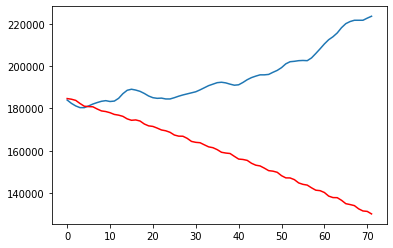

In [25]:


# split dataset using second order differenced data
diff_1 = zip_df['1001'].diff()[1:]
diff_2 = diff_1.diff()[1:]
test_undiff = zip_df['1001'][-72:].values
X = zip_df['1001'].diff()[1:].diff()[1:].values
train, test = X[0:len(X)-72], X[len(X)-72:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions on the differenced data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print(len(predictions))

print(X.size)
np.r_[train, predictions].size
#convert predictions back to values

predicted_values = transform_diff2s(zip_df['1001'][0], diff_1[0], np.r_[train, predictions])

model_predictions = predicted_values[-72:]
# print(X[-72], zip_df['1001'][[-74, -72]])
for i in range(len(model_predictions)):
    print('predicted=%f, expected=%f' % (model_predictions[i], test_undiff[i]))
    rmse = sqrt(mean_squared_error(test_undiff, model_predictions))
    print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test_undiff)
plt.plot(model_predictions, color='red')

plt.show()

In [26]:
# Let's Try a Naive Persistence Model as a baseline:

# Create lagged dataset
values = pd.DataFrame(zip_df['1001'].values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
df

,t,t+1
0,NaN,113100.0
1,113100.0,112800.0
2,112800.0,112600.0
3,112600.0,112300.0
4,112300.0,112100.0
...,...,...
260,221100.0,221700.0
261,221700.0,221700.0
262,221700.0,221700.0
263,221700.0,222700.0


In [27]:
# split into train and test sets

X = df.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]



In [28]:
# persistence model

predictions = [x for x in test_X]


# load data
series = zip_df['1001']
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.describe()

Test RMSE: 1047.100


,0
count,67.000000
mean,644.776119
std,831.261105
min,-1200.000000
25%,100.000000
50%,600.000000
75%,1000.000000
max,2500.000000


In [29]:
# Test Harness - We will be making predictions based off of a five year holding period, lets withhold 60 months as a validation set
split_point = len(zip_df['1001']) - 60
train, test = zip_df['1001'][:split_point], zip_df['1001'][split_point:]

print(len(train), len(test))


205 60


In [30]:
# Performance Measure-- We will be using RMSE initially

def RMSE(y_true, y_pred):
    """Simple wrapper function on mean_squared_error to return RMSE
    
    Params:
        predictions (series or array like object), the predicted values from model
        test_data (series or array like object), the true target values
        
    Returns:
        RMSE (list) list of accumulated RMSE values for each observation in consecutive time order
        i.e. the first return value will be just the error of first prediction, second the sqrt of mean squared error for first 2 predictions, etc."""
    # Import necessary function
    from sklearn.metrics import mean_squared_error
    
    # Ensure predictions and test_data are same size
    if len(y_pred) != len(y_true):
        return "Test data and predictions must have equal length"
    
    else:
        rmse = [mean_squared_error(y_true[:i+1], y_pred[:i+1], squared=False) for i, _ in enumerate(y_pred)]
        return rmse
    
test_a = [i for i in range(11)]
test_preds = [i + 1 if i < 6 else i + 5 for i in test_a]

RMSE(test_a, test_preds)
    

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.104417123236605,
 2.6457513110645907,
 3.0,
 3.255764119219941,
 3.4509550720186013]

In [31]:
# Stationarity Test Wrapper:
def test_stationarity(series):
    """Simple wrapper around adfuller that prints in more readable format
    
    Params:
        series (series) a timeseries
    Returns:
        None"""
    
    from statsmodels.tsa.stattools import adfuller 
    
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return None



In [32]:
# Example of stationarity test, this suggests that d param in ARIMA model should be at least 2 for the 1001 zipcode series
# because the ADF statistic is not less than critical value at 5% significance level until second order differencing (with p value of 0)

test_stationarity(zip_df['1001'])
test_stationarity(zip_df['1001'].diff()[1:])
test_stationarity(zip_df['1001'].diff()[1:].diff()[1:])

ADF Statistic: -1.746793
p-value: 0.407179
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -1.945353
p-value: 0.311036
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -6.627156
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


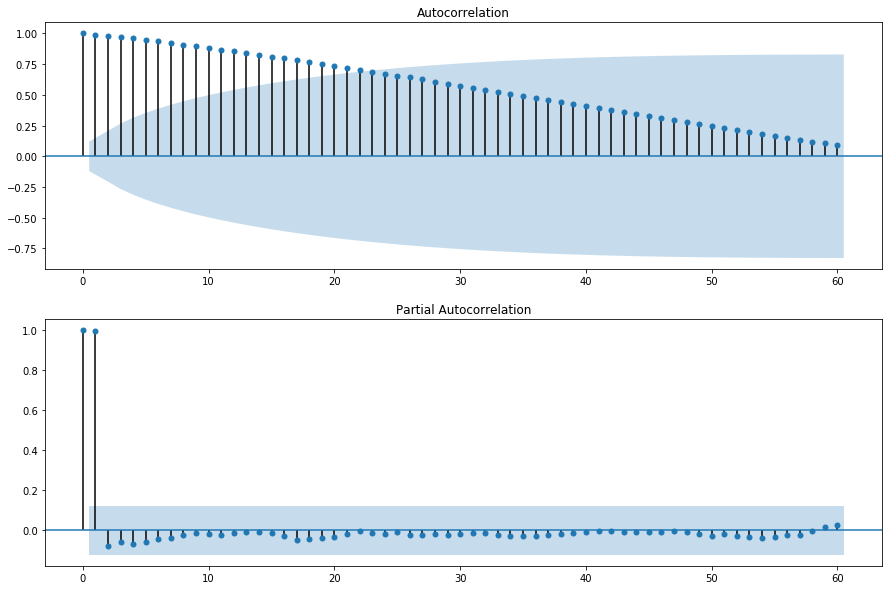

In [33]:
# This suggests that at least two levels of differencing is required. The d parameter in our
# ARIMA model should at least be a value of 2. The next step is to select the lag values for
# the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can
# do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function
# (PACF) plots. The example below creates ACF and PACF plots for the series. (TEXT OF THIS APPROACH TAKEN FROM INTRO TO TIMESERIES FORECASTING w/ PYTHON
# BROWNLEE)

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

series = zip_df['1001']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=60, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=60, ax=plt.gca())
plt.show()


In [34]:
# ACF shows significant lag for about 20-22 months
# PACF shows a significant lag for 2 months
# A good starting point for p and q values is 20, 2 >> this does not converge


from statsmodels.tsa.arima.model import ARIMA

# load data
series = zip_df['1001']
# prepare data
X = series.values
X = X.astype('float32')

# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(7,2,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)
print(rmse)

>Predicted=183768.513, Expected=184800.000
>Predicted=186189.249, Expected=187000.000
>Predicted=189212.764, Expected=188600.000
>Predicted=190096.867, Expected=189100.000
>Predicted=189479.643, Expected=188700.000
>Predicted=188271.599, Expected=188100.000
>Predicted=187561.946, Expected=187100.000
>Predicted=186156.530, Expected=185900.000
>Predicted=184750.228, Expected=185100.000
>Predicted=184396.494, Expected=184800.000
>Predicted=184550.653, Expected=184900.000
>Predicted=185010.334, Expected=184500.000
>Predicted=184028.019, Expected=184500.000
>Predicted=184505.170, Expected=185100.000
>Predicted=185735.701, Expected=185800.000
>Predicted=186446.998, Expected=186400.000
>Predicted=186968.813, Expected=186900.000
>Predicted=187379.042, Expected=187400.000
>Predicted=187881.308, Expected=187900.000
>Predicted=188398.861, Expected=188800.000
>Predicted=189734.123, Expected=189800.000
>Predicted=190796.787, Expected=190800.000
>Predicted=191774.959, Expected=191500.000
>Predicted=

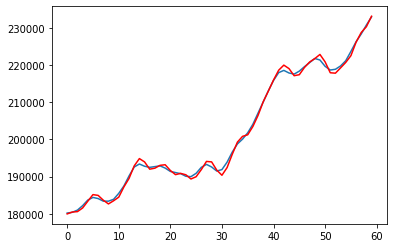

In [61]:
plt.plot(test)
plt.plot(predictions, color='red')

plt.show()

In [63]:
zip_df['22101']

time
1996-04-01     381700.0
1996-05-01     379800.0
1996-06-01     377800.0
1996-07-01     375600.0
1996-08-01     373500.0
                ...    
2017-12-01    1050500.0
2018-01-01    1057900.0
2018-02-01    1069800.0
2018-03-01    1091700.0
2018-04-01    1108400.0
Name: 22101, Length: 265, dtype: float64

In [47]:
zip_df['46240']

time
1996-04-01    142100.0
1996-05-01    141300.0
1996-06-01    140400.0
1996-07-01    139600.0
1996-08-01    138700.0
                ...   
2017-12-01    223700.0
2018-01-01    226300.0
2018-02-01    228400.0
2018-03-01    230800.0
2018-04-01    233000.0
Name: 46240, Length: 265, dtype: float64

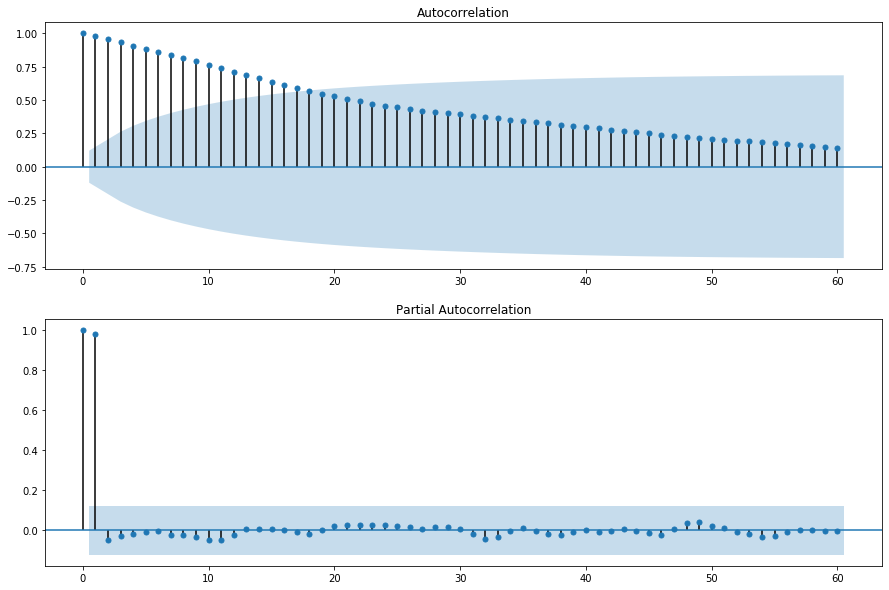

In [49]:
series = zip_df['46240']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=60, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=60, ax=plt.gca())
plt.show()

In [60]:

series = zip_df['46240']
# prepare data
X = series.values
X = X.astype('float32')

# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(6,2,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)
print(rmse)


>Predicted=179965.775, Expected=180200.000
>Predicted=180472.827, Expected=180400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=180586.310, Expected=181000.000
>Predicted=181564.283, Expected=182200.000
>Predicted=183386.046, Expected=183700.000
>Predicted=185162.554, Expected=184400.000
>Predicted=184953.762, Expected=184100.000
>Predicted=183661.954, Expected=183400.000
>Predicted=182655.871, Expected=183400.000
>Predicted=183506.985, Expected=183900.000
>Predicted=184476.697, Expected=185500.000
>Predicted=187241.852, Expected=187500.000
>Predicted=189530.676, Expected=190200.000
>Predicted=192906.672, Expected=192600.000
>Predicted=194859.967, Expected=193400.000
>Predicted=193967.476, Expected=192800.000
>Predicted=192009.590, Expected=192500.000
>Predicted=192274.190, Expected=192700.000
>Predicted=193041.981, Expected=192900.000
>Predicted=193202.682, Expected=192300.000
>Predicted=191659.993, Expected=191400.000
>Predicted=190535.533, Expected=191100.000
>Predicted=190878.522, Expected=190800.000
>Predicted=190505.777, Expected=190100.000
>Predicted=189368.181, Expected=190000.000
>Predicted=

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=193970.861, Expected=192600.000
>Predicted=191755.507, Expected=191500.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=190372.630, Expected=191900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=192436.393, Expected=193900.000
>Predicted=196005.098, Expected=196600.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=199293.835, Expected=198800.000
>Predicted=200842.506, Expected=200100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=201268.566, Expected=201800.000
>Predicted=203499.162, Expected=204100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=206480.816, Expected=207100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=210134.141, Expected=210100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=213037.084, Expected=213100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=216001.218, Expected=215900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=218648.203, Expected=218000.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=220019.553, Expected=218600.000
>Predicted=219083.573, Expected=217900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217169.003, Expected=217600.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217440.743, Expected=218400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=219391.045, Expected=219600.000
>Predicted=220856.784, Expected=220700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=221774.117, Expected=221800.000
>Predicted=222892.956, Expected=221400.000
>Predicted=220898.451, Expected=219700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217965.226, Expected=218700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217848.763, Expected=218900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=219278.465, Expected=219800.000
>Predicted=220744.075, Expected=221200.000
>Predicted=222555.548, Expected=223700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=226176.962, Expected=226300.000
>Predicted=228795.102, Expected=228400.000
>Predicted=230355.614, Expected=230800.000
>Predicted=233176.340, Expected=233000.000
[234.22478308610152, 173.44302128448297, 277.6713655477864, 398.5723462103945, 383.14659544223963, 468.24060566885765, 540.4238809866127, 513.9340332015935, 544.3398802731879, 531.1510411131028, 593.017127041921, 572.6403085389317, 580.6493791899851, 565.4988731186338, 663.7544314517478, 705.8482999933752, 695.0264775164496, 682.8601899975039, 665.4449718661076, 679.2775025134326, 665.3303785206726, 661.0796367474177, 646.7559193615806, 638.5334539568687, 638.266227657047, 651.442949062004, 650.2354702092463, 656.0170080328476, 693.0515112562247, 682.9976841707008, 725.7350722361144, 759.719896391887, 755.2540632448552, 748.8689624976467, 748.6879250081174, 743.5107779984219, 740.0165168914351, 737.0905332942144, 727.599827736688, 718.516132519578, 709.8756745346552, 708.4696764243974, 732.8847335050709, 746.15690832

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


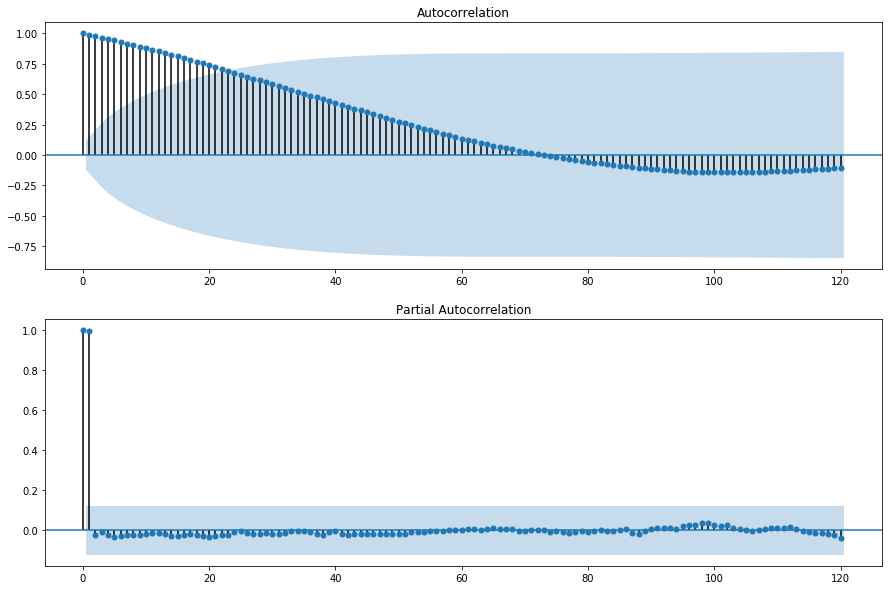

In [71]:
series = zip_df['22101']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=120, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=120, ax=plt.gca())
plt.show()

In [130]:
%%time

series = zip_df['22101']
# prepare data
X = series.values
X = X.astype('float32')


# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(9,2,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)
print(rmse)


>Predicted=897882.457, Expected=898900.000
>Predicted=906378.716, Expected=904600.000
>Predicted=910276.187, Expected=909400.000
>Predicted=914190.467, Expected=913700.000
>Predicted=917988.439, Expected=916700.000
>Predicted=919691.137, Expected=919000.000
>Predicted=921305.488, Expected=920400.000
>Predicted=921802.689, Expected=921600.000
>Predicted=922812.495, Expected=923500.000
>Predicted=925432.291, Expected=925300.000
>Predicted=927127.596, Expected=923300.000
>Predicted=921298.101, Expected=919800.000
>Predicted=916301.440, Expected=916100.000
>Predicted=912408.148, Expected=913600.000
>Predicted=911123.187, Expected=912000.000
>Predicted=910434.687, Expected=910900.000
>Predicted=909831.404, Expected=909600.000
>Predicted=908323.639, Expected=909800.000
>Predicted=910026.290, Expected=909400.000
>Predicted=908998.856, Expected=906400.000
>Predicted=903369.915, Expected=907200.000
>Predicted=908003.093, Expected=914700.000
>Predicted=922231.276, Expected=920600.000
>Predicted=

In [70]:
1 - (2799 / (test[-1] - test[0]))

0.9866396181384248

In [48]:
zip_df['46240'][-60:]

time
2013-05-01    180200.0
2013-06-01    180400.0
2013-07-01    181000.0
2013-08-01    182200.0
2013-09-01    183700.0
2013-10-01    184400.0
2013-11-01    184100.0
2013-12-01    183400.0
2014-01-01    183400.0
2014-02-01    183900.0
2014-03-01    185500.0
2014-04-01    187500.0
2014-05-01    190200.0
2014-06-01    192600.0
2014-07-01    193400.0
2014-08-01    192800.0
2014-09-01    192500.0
2014-10-01    192700.0
2014-11-01    192900.0
2014-12-01    192300.0
2015-01-01    191400.0
2015-02-01    191100.0
2015-03-01    190800.0
2015-04-01    190100.0
2015-05-01    190000.0
2015-06-01    190900.0
2015-07-01    192500.0
2015-08-01    193300.0
2015-09-01    192600.0
2015-10-01    191500.0
2015-11-01    191900.0
2015-12-01    193900.0
2016-01-01    196600.0
2016-02-01    198800.0
2016-03-01    200100.0
2016-04-01    201800.0
2016-05-01    204100.0
2016-06-01    207100.0
2016-07-01    210100.0
2016-08-01    213100.0
2016-09-01    215900.0
2016-10-01    218000.0
2016-11-01    218600.0
2016-1

In [44]:
zip_df.index == zip_df.index[-60]].isna()

151

In [73]:
zip_df

,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.0,161000.0,103100.0,133400.0,117500.0,115800.0,87000.0,88500.0,97200.0,91200.0,...,122700.0,112200.0,112500.0,89400.0,101900.0,103000.0,109200.0,166800.0,155500.0,117100.0
1996-05-01,112800.0,160100.0,103400.0,132700.0,117300.0,115700.0,87000.0,88500.0,97100.0,91100.0,...,124200.0,112400.0,113100.0,89800.0,102900.0,103900.0,109600.0,166200.0,154900.0,117200.0
1996-06-01,112600.0,159300.0,103600.0,132000.0,117100.0,115500.0,87100.0,88400.0,97000.0,91000.0,...,125700.0,112600.0,113800.0,90200.0,103800.0,104700.0,110000.0,165400.0,154200.0,117300.0
1996-07-01,112300.0,158600.0,103800.0,131400.0,117000.0,115300.0,87200.0,88300.0,96800.0,90800.0,...,127200.0,112800.0,114400.0,90600.0,104700.0,105500.0,110400.0,164400.0,153500.0,117400.0
1996-08-01,112100.0,158000.0,103900.0,130800.0,116800.0,115100.0,87400.0,88200.0,96600.0,90700.0,...,128600.0,113000.0,115100.0,91000.0,105400.0,106200.0,110800.0,163500.0,152800.0,117500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,221700.0,342000.0,213300.0,268100.0,205400.0,243800.0,151400.0,173300.0,187400.0,201200.0,...,258800.0,219100.0,250200.0,206700.0,261100.0,262800.0,273500.0,402300.0,396200.0,291900.0
2018-01-01,221700.0,344500.0,215600.0,268100.0,204500.0,244600.0,150100.0,174600.0,188100.0,204600.0,...,259400.0,218900.0,250600.0,206100.0,261300.0,262800.0,273800.0,406200.0,397500.0,294200.0
2018-02-01,221700.0,347400.0,217900.0,268800.0,206800.0,246700.0,150100.0,175900.0,189000.0,211200.0,...,259900.0,218300.0,250100.0,205600.0,261400.0,262300.0,273800.0,409800.0,398900.0,297500.0


In [89]:
zip_df[zip_df.iloc[-60].isna(), axis=1]

SyntaxError: invalid syntax (<ipython-input-89-1bf59af87cb3>, line 1)

In [117]:
def five_year_roi(series):
    """Return five year roi for zipcode dataframe, returning zero if na denominator values
    
    Params: series
    Returns: (float) ROI for preceding five years"""
    import numpy as np
    
    start_val = series[-60]
    end_val = series[-1]
    
    # Return zero if na value five years ago
    if np.isnan(start_val):
        return 0
    # Otherwise return ROI for those five years
    else:
        total_return = end_val - start_val
        roi = total_return / start_val
        return roi
    
five_year_roi(zip_df['1001'])    

0.20995670995670995

In [115]:
zip_df['1001'][-1] / zip_df['1001'][-60] - 1

0.2099567099567099

In [116]:
38800 / zip_df['1001'][-60]

0.20995670995670995

In [119]:
five_year_rois = {column: five_year_roi(zip_df[column]) for column in zip_df.columns}

In [123]:
five_year_rois = {zipcode: roi for zipcode, roi in sorted(five_year_rois.items(), key=lambda item: item[1], reverse=True)}

In [134]:
# Sample test of ARIMA model took about 20 seconds to run, if we allow 20 minutes for modeling, then we want 60 zipcodes to test
test_zips = list(five_year_rois.keys())[0: 62]
test_zips

['80216',
 '94601',
 '48240',
 '94590',
 '33705',
 '37210',
 '15201',
 '33460',
 '33030',
 '37207',
 '11216',
 '33461',
 '33415',
 '32807',
 '34234',
 '34207',
 '34982',
 '33055',
 '33801',
 '30316',
 '33135',
 '33830',
 '32180',
 '33435',
 '33033',
 '48237',
 '33056',
 '80204',
 '32839',
 '94805',
 '33614',
 '85035',
 '11963',
 '94606',
 '94804',
 '33713',
 '33161',
 '32905',
 '30034',
 '34205',
 '33404',
 '33125',
 '33032',
 '32204',
 '48198',
 '33563',
 '80010',
 '93505',
 '33162',
 '32744',
 '94589',
 '33406',
 '48239',
 '33068',
 '32205',
 '80219',
 '30238',
 '33982',
 '33805',
 '49507',
 '89104',
 '33409']

In [138]:
zipcodes = zip_df[test_zips]
zipcodes.dropna(axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
zipcodes

,94601,48240,94590,33705,37210,15201,33460,33030,37207,11216,...,48239,33068,32205,80219,30238,33982,33805,49507,89104,33409
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,114600.0,67800.0,108200.0,54600.0,60800.0,34400.0,59800.0,76700.0,63600.0,146100.0,...,80100.0,82000.0,54700.0,83700.0,85300.0,64100.0,41900.0,49700.0,94800.0,77300.0
1996-05-01,114500.0,68200.0,107800.0,54800.0,61000.0,34600.0,59900.0,76600.0,63600.0,146600.0,...,80700.0,81900.0,54600.0,84000.0,85300.0,63700.0,41900.0,51000.0,94700.0,77200.0
1996-06-01,114500.0,68500.0,107500.0,55000.0,61200.0,34700.0,60000.0,76500.0,63600.0,147200.0,...,81300.0,81800.0,54400.0,84300.0,85300.0,63300.0,42000.0,52300.0,94700.0,77200.0
1996-07-01,114400.0,68800.0,107300.0,55200.0,61300.0,34700.0,60200.0,76400.0,63700.0,147700.0,...,81900.0,81700.0,54300.0,84700.0,85300.0,62900.0,42100.0,53500.0,94700.0,77100.0
1996-08-01,114400.0,69200.0,107100.0,55400.0,61500.0,34800.0,60400.0,76300.0,64000.0,148400.0,...,82500.0,81600.0,54200.0,85100.0,85200.0,62500.0,42200.0,54600.0,94800.0,77100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,535800.0,71000.0,357100.0,167100.0,217200.0,170400.0,206000.0,209200.0,189500.0,1545700.0,...,90800.0,209200.0,141100.0,298100.0,95400.0,187800.0,97000.0,106600.0,196300.0,190000.0
2018-01-01,546900.0,72300.0,362500.0,168200.0,219300.0,171400.0,209600.0,211100.0,191400.0,1540200.0,...,91900.0,211000.0,144100.0,302600.0,97200.0,192500.0,99000.0,107800.0,199500.0,192500.0
2018-02-01,555000.0,73500.0,366900.0,171100.0,221500.0,173900.0,211600.0,212700.0,193900.0,1553600.0,...,93600.0,213700.0,146100.0,306900.0,99100.0,196400.0,100400.0,108900.0,202500.0,193700.0


In [147]:
test_stationarity(zipcodes['94601'])
test_stationarity(zipcodes['94601'].diff()[1:])
test_stationarity(zipcodes['94601'].diff()[1:].diff()[1:])

ADF Statistic: -2.047906
p-value: 0.265971
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -2.062114
p-value: 0.260019
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -4.522312
p-value: 0.000179
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


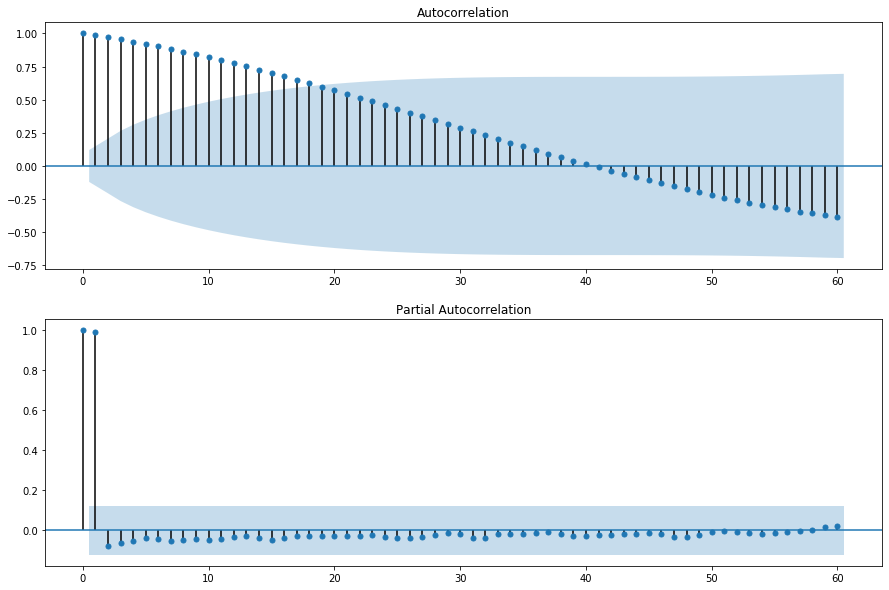

In [140]:
series = zipcodes['94601']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=60, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=60, ax=plt.gca())
plt.show()

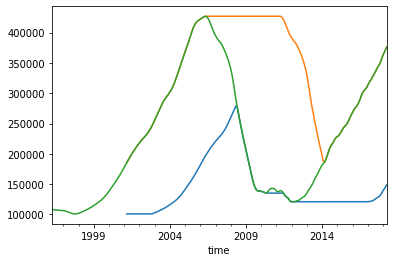

In [151]:
zipcodes['94590'].rolling(60).min().plot()
zipcodes['94590'].rolling(60).max().plot()
zipcodes['94590'].plot()

In [148]:
%%time

series = zipcodes['94601']
# prepare data
X = series.values
X = X.astype('float32')


# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(13,2,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)

print(rmse)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=219965.768, Expected=221400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=231632.526, Expected=233100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=245220.672, Expected=244000.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=254866.445, Expected=251600.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=258656.536, Expected=257500.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=263136.990, Expected=263200.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=269194.781, Expected=267500.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=272100.280, Expected=271100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=274789.319, Expected=275400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=279726.781, Expected=280800.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=286316.686, Expected=287200.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=293765.247, Expected=292000.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=296347.036, Expected=294200.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=295694.930, Expected=293900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=293332.067, Expected=294100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=294190.595, Expected=297300.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=300578.653, Expected=302200.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=307298.983, Expected=307700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=313326.379, Expected=313600.000
>Predicted=319597.506, Expected=318800.000
>Predicted=323804.273, Expected=323100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=327112.067, Expected=327300.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=331364.188, Expected=332200.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=337272.554, Expected=339500.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=347203.914, Expected=349500.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=360010.384, Expected=358800.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=368141.432, Expected=366700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=374454.830, Expected=375100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=383306.741, Expected=382900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=390620.287, Expected=386200.000
>Predicted=389167.669, Expected=389800.000
>Predicted=393538.093, Expected=397600.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=405861.252, Expected=406500.000
>Predicted=415596.928, Expected=413300.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=419917.318, Expected=418100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=422593.142, Expected=421000.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=423538.169, Expected=424400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=427610.754, Expected=429100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=433789.150, Expected=435000.000
>Predicted=441100.482, Expected=440400.000
>Predicted=445988.451, Expected=445200.000
>Predicted=450009.273, Expected=450400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=455397.057, Expected=456600.000
>Predicted=462616.388, Expected=463000.000
>Predicted=469309.512, Expected=469500.000
>Predicted=476095.173, Expected=473600.000
>Predicted=477726.861, Expected=476200.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=478780.533, Expected=480800.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=485538.890, Expected=488500.000
>Predicted=496431.391, Expected=496000.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=503464.410, Expected=501300.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=506436.711, Expected=506600.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=511858.296, Expected=514100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=521659.797, Expected=521100.000
>Predicted=527934.508, Expected=526700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=532197.454, Expected=535800.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=545160.782, Expected=546900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=558174.763, Expected=555000.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=562908.611, Expected=562000.000
>Predicted=568879.421, Expected=566700.000
[1434.2316611357382, 1450.9477858144894, 1378.4699162624493, 2023.0052361326382, 1881.9020503158733, 1718.1262510160568, 1714.810703904687, 1642.5814149967975, 1561.9617781612135, 1520.1750284448626, 1473.6955687677287, 1500.1572957529831, 1559.4729232739671, 1577.4572391054216, 1536.813157364986, 1678.8262291780222, 1675.4996774978067, 1631.0340989072931, 1588.7725913150787, 1558.7781290892897, 1528.9552321360668, 1494.3393936283471, 1471.8472086467798, 1510.8938085982775, 1549.9575823670018, 1538.2837929011164, 1534.8056719735578, 1512.0729887267862, 1487.6926211918242, 1670.554648811637, 1647.3089250987173, 1773.251915508192, 1749.7143909664155, 1768.2276976859268, 1769.6491633712128, 1764.9845425088708, 1746.7258061020295, 1740.4380951661362, 1728.88653608388, 1710.7277111144565, 1694.2170453280507, 1675.011688545578, 1665.553658410061, 1647.5334525677563, 1629.3721401216303, 1653.0229036898713, 1

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [152]:
model_fit

In [153]:
zipcodes

,94601,48240,94590,33705,37210,15201,33460,33030,37207,11216,...,48239,33068,32205,80219,30238,33982,33805,49507,89104,33409
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,114600.0,67800.0,108200.0,54600.0,60800.0,34400.0,59800.0,76700.0,63600.0,146100.0,...,80100.0,82000.0,54700.0,83700.0,85300.0,64100.0,41900.0,49700.0,94800.0,77300.0
1996-05-01,114500.0,68200.0,107800.0,54800.0,61000.0,34600.0,59900.0,76600.0,63600.0,146600.0,...,80700.0,81900.0,54600.0,84000.0,85300.0,63700.0,41900.0,51000.0,94700.0,77200.0
1996-06-01,114500.0,68500.0,107500.0,55000.0,61200.0,34700.0,60000.0,76500.0,63600.0,147200.0,...,81300.0,81800.0,54400.0,84300.0,85300.0,63300.0,42000.0,52300.0,94700.0,77200.0
1996-07-01,114400.0,68800.0,107300.0,55200.0,61300.0,34700.0,60200.0,76400.0,63700.0,147700.0,...,81900.0,81700.0,54300.0,84700.0,85300.0,62900.0,42100.0,53500.0,94700.0,77100.0
1996-08-01,114400.0,69200.0,107100.0,55400.0,61500.0,34800.0,60400.0,76300.0,64000.0,148400.0,...,82500.0,81600.0,54200.0,85100.0,85200.0,62500.0,42200.0,54600.0,94800.0,77100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,535800.0,71000.0,357100.0,167100.0,217200.0,170400.0,206000.0,209200.0,189500.0,1545700.0,...,90800.0,209200.0,141100.0,298100.0,95400.0,187800.0,97000.0,106600.0,196300.0,190000.0
2018-01-01,546900.0,72300.0,362500.0,168200.0,219300.0,171400.0,209600.0,211100.0,191400.0,1540200.0,...,91900.0,211000.0,144100.0,302600.0,97200.0,192500.0,99000.0,107800.0,199500.0,192500.0
2018-02-01,555000.0,73500.0,366900.0,171100.0,221500.0,173900.0,211600.0,212700.0,193900.0,1553600.0,...,93600.0,213700.0,146100.0,306900.0,99100.0,196400.0,100400.0,108900.0,202500.0,193700.0


In [169]:
# First go at using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

series = zipcodes['48240']

train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]

model = SARIMAX(train, order=(13,2,2))

results = model.fit()

forecast = results.get_forecast(steps=60)

predictions = forecast.predicted_mean


RMSE(test, predictions)

results.save('../models/bad_first_model.pkl')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [165]:
test

array([221400., 233100., 244000., 251600., 257500., 263200., 267500.,
       271100., 275400., 280800., 287200., 292000., 294200., 293900.,
       294100., 297300., 302200., 307700., 313600., 318800., 323100.,
       327300., 332200., 339500., 349500., 358800., 366700., 375100.,
       382900., 386200., 389800., 397600., 406500., 413300., 418100.,
       421000., 424400., 429100., 435000., 440400., 445200., 450400.,
       456600., 463000., 469500., 473600., 476200., 480800., 488500.,
       496000., 501300., 506600., 514100., 521100., 526700., 535800.,
       546900., 555000., 562000., 566700.], dtype=float32)

In [162]:
len(test)

60